# Task 1: Feature Selection Schemes

In this assignment you will understand Feature selection techniques

###Forward Selection: 
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

###Backward Elimination: 
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

###Recursive Feature elimination: 
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

##Dataset
The dataset is available at "data/bank-full.csv" in the respective challenge's repo.
The dataset can be obtained from:
https://www.kaggle.com/sonujha090/bank-marketing

#Features (X)
##Input variables:
# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric)
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)

##Output variable (desired target):
21. y. has the client subscribed a term deposit? (binary: 'yes','no')

#### Objective
- To apply different feature selection approaches such as Forward Selection, Backward Elimination and recursive feature elimination for feature selection in Logistic Regression Algorithm.


#### Tasks
- Download and load the data (csv file)
- Process the data 
- Split the dataset into 70% for training and rest 30% for testing (sklearn.model_selection.train_test_split function)
- Train Logistic Regression
- Apply feature selection techniques
- Train the models on the feature reduced datasets
- Compare their accuracies and print feature subset

#### Further Fun
- Perform feature selection with other schemes in the Sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection|

#### Helpful links
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Feature Scaling: https://scikit-learn.org/stable/modules/preprocessing.html
- Train-test splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Feature selection in ML: https://machinelearningmastery.com/feature-selection-machine-learning-python/
- Feature selection in sklearn: https://scikit-learn.org/stable/modules/feature_selection.html
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g




In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn import preprocessing

In [2]:
banking =  pd.read_csv('bank-full.csv')

In [3]:
banking.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
banking.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
banking.head(6)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   
5   35    management  married   tertiary      no      231     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
5  unknown    5   may       139         1     -1         0  unknown  no

In [6]:
banking.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [7]:
banking.shape

(45211, 17)

In [8]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
mms=preprocessing.MinMaxScaler()


In [10]:

nor=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in nor:
    banking[i]=mms.fit_transform(np.array(banking[i]).reshape(-1,1))

In [11]:
banking

age            job   marital  education default   balance housing  \
0      0.519481     management   married   tertiary      no  0.092259     yes   
1      0.337662     technician    single  secondary      no  0.073067     yes   
2      0.194805   entrepreneur   married  secondary      no  0.072822     yes   
3      0.376623    blue-collar   married    unknown      no  0.086476     yes   
4      0.194805        unknown    single    unknown      no  0.072812      no   
5      0.220779     management   married   tertiary      no  0.074901     yes   
6      0.129870     management    single   tertiary      no  0.076862     yes   
7      0.311688   entrepreneur  divorced   tertiary     yes  0.072822     yes   
8      0.519481        retired   married    primary      no  0.073902     yes   
9      0.324675     technician    single  secondary      no  0.078187     yes   
10     0.298701         admin.  divorced  secondary      no  0.075255     yes   
11     0.142857         admin.    single  secondary      no  0.076344     yes   
12     0.454545     technician   married  secondary      no  0.072858     yes   
13     0.519481     technician   married    unknown      no  0.073448     yes   
14     0.506494       services   married  secondary      no  0.074274     yes   
15     0.428571        retired   married    primary      no  0.074882     yes   
16     0.350649         admin.    single    unknown      no  0.072921     yes   
17     0.506494    blue-collar   married    primary      no  0.073275     yes   
18     0.545455        retired   married    primary      no  0.073348     yes   
19     0.194805       services   married  secondary      no  0.072803     yes   
20     0.129870    blue-collar   married  secondary      no  0.079367     yes   
21     0.493506     management   married   tertiary      no  0.079876     yes   
22     0.181818    blue-collar    single    primary      no  0.073012     yes   
23     0.090909       services   married  secondary      no  0.073257     yes   
24     0.285714        retired   married    primary      no  0.072803     yes   
25     0.337662         admin.   married  secondary      no  0.069426     yes   
26     0.272727     management    single   tertiary      no  0.075118     yes   
27     0.441558   entrepreneur   married  secondary      no  0.073829     yes   
28     0.363636     management    single  secondary      no  0.070570     yes   
29     0.233766     technician    single  secondary      no  0.075209     yes   
...         ...            ...       ...        ...     ...       ...     ...   
45181  0.363636    blue-collar   married  secondary      no  0.135257      no   
45182  0.207792     technician   married  secondary      no  0.074011      no   
45183  0.675325        retired   married    primary      no  0.075745      no   
45184  0.584416        retired   married  secondary      no  0.086376      no   
45185  0.545455       services   married   tertiary      no  0.111443     yes   
45186  0.532468        unknown   married    unknown      no  0.086422      no   
45187  0.181818       services    single  secondary      no  0.083407     yes   
45188  0.142857     management    single  secondary      no  0.079186     yes   
45189  0.090909       services    single  secondary      no  0.074610      no   
45190  0.181818    blue-collar   married  secondary      no  0.074038      no   
45191  0.740260        retired  divorced   tertiary      no  0.107394     yes   
45192  0.142857     management    single   tertiary      no  0.079749      no   
45193  0.129870  self-employed    single   tertiary      no  0.074247      no   
45194  0.532468     management   married   tertiary      no  0.074056     yes   
45195  0.649351        retired   married  secondary      no  0.083208      no   
45196  0.090909        student    single  secondary      no  0.076054      no   
45197  0.233766     management    single  secondary      no  0.086522     yes   
45198  0.246753     management   married   

In [12]:
banking.rename(columns={"y":"Action"},inplace = True)

In [13]:
#banking.Action.value_counts()

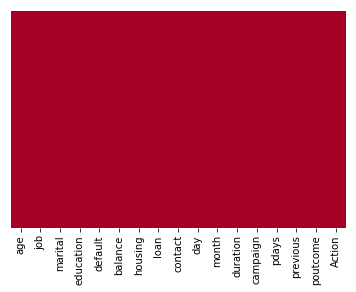

In [14]:
sns.heatmap(banking.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')

In [15]:
new_data =  banking.select_dtypes(include='object')

In [16]:
#checking the number of uique categories in each column
for i in new_data.columns:
  print(i,';',new_data[i].unique(),'labels')

job ; ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] labels
marital ; ['married' 'single' 'divorced'] labels
education ; ['tertiary' 'secondary' 'unknown' 'primary'] labels
default ; ['no' 'yes'] labels
housing ; ['yes' 'no'] labels
loan ; ['no' 'yes'] labels
contact ; ['unknown' 'cellular' 'telephone'] labels
month ; ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] labels
poutcome ; ['unknown' 'failure' 'other' 'success'] labels
Action ; ['no' 'yes'] labels


In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
new_data_encoded = new_data.apply(lb.fit_transform)
new_data_nonobject = banking.select_dtypes(exclude = ["object"])
banking1 = pd.concat([new_data_nonobject,new_data_encoded], axis = 1)

In [18]:
banking1.head()

age   balance       day  duration  campaign  pdays  previous  job  \
0  0.519481  0.092259  0.133333  0.053070       0.0    0.0       0.0    4   
1  0.337662  0.073067  0.133333  0.030704       0.0    0.0       0.0    9   
2  0.194805  0.072822  0.133333  0.015453       0.0    0.0       0.0    2   
3  0.376623  0.086476  0.133333  0.018707       0.0    0.0       0.0    1   
4  0.194805  0.072812  0.133333  0.040260       0.0    0.0       0.0   11   

   marital  education  default  housing  loan  contact  month  poutcome  \
0        1          2        0        1     0        2      8         3   
1        2          1        0        1     0        2      8         3   
2        1          1        0        1     1        2      8         3   
3        1          3        0        1     0        2      8         3   
4        2          3        0        0     0        2      8         3   

   Action  
0       0  
1       0  
2       0  
3       0  
4       0

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
banking1.shape

(45211, 17)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.892214685933353

# K Best Features

In [32]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import chi2 
from sklearn.feature_selection import f_classif

In [33]:
X = banking1.iloc[:,0:16]
y = banking1['Action']

In [34]:
x=X.columns
x

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [35]:
X.shape

(45211, 16)

In [36]:
Kbest = SelectKBest(f_classif,k=10)   #k=10 by default
kfit = Kbest.fit(X,y)


In [37]:
scores = pd.DataFrame(kfit.scores_)
columns = pd.DataFrame(X.columns)

In [38]:
df=pd.concat([columns,scores],axis=1)
df.columns=['columns','scores']
df

columns       scores
0         age    28.625233
1     balance   126.572276
2         day    36.359010
3    duration  8333.761148
4    campaign   243.358404
5       pdays   490.696563
6    previous   396.443989
7         job    74.048351
8     marital    94.150026
9   education   199.242825
10    default    22.733923
11    housing   892.950576
12       loan   211.167395
13    contact  1017.965930
14      month    27.089689
15   poutcome   275.596872

In [39]:
new=pd.DataFrame(kfit.transform(X))

In [40]:
new

0         1         2         3         4    5    6    7    8  \
0      0.092259  0.053070  0.000000  0.000000  0.000000  2.0  1.0  0.0  2.0   
1      0.073067  0.030704  0.000000  0.000000  0.000000  1.0  1.0  0.0  2.0   
2      0.072822  0.015453  0.000000  0.000000  0.000000  1.0  1.0  1.0  2.0   
3      0.086476  0.018707  0.000000  0.000000  0.000000  3.0  1.0  0.0  2.0   
4      0.072812  0.040260  0.000000  0.000000  0.000000  3.0  0.0  0.0  2.0   
5      0.074901  0.028264  0.000000  0.000000  0.000000  2.0  1.0  0.0  2.0   
6      0.076862  0.044124  0.000000  0.000000  0.000000  2.0  1.0  1.0  2.0   
7      0.072822  0.077267  0.000000  0.000000  0.000000  2.0  1.0  0.0  2.0   
8      0.073902  0.010167  0.000000  0.000000  0.000000  0.0  1.0  0.0  2.0   
9      0.078187  0.011183  0.000000  0.000000  0.000000  1.0  1.0  0.0  2.0   
10     0.075255  0.045140  0.000000  0.000000  0.000000  1.0  1.0  0.0  2.0   
11     0.076344  0.027857  0.000000  0.000000  0.000000  1.0  1.0  0.0  2.0   
12     0.072858  0.105124  0.000000  0.000000  0.000000  1.0  1.0  0.0  2.0   
13     0.073448  0.014437  0.000000  0.000000  0.000000  3.0  1.0  0.0  2.0   
14     0.074274  0.035380  0.000000  0.000000  0.000000  1.0  1.0  0.0  2.0   
15     0.074882  0.071777  0.000000  0.000000  0.000000  0.0  1.0  0.0  2.0   
16     0.072921  0.019927  0.000000  0.000000  0.000000  3.0  1.0  0.0  2.0   
17     0.073275  0.007727  0.000000  0.000000  0.000000  0.0  1.0  0.0  2.0   
18     0.073348  0.044530  0.000000  0.000000  0.000000  0.0  1.0  0.0  2.0   
19     0.072803  0.010980  0.000000  0.000000  0.000000  1.0  1.0  0.0  2.0   
20     0.079367  0.053274  0.000000  0.000000  0.000000  1.0  1.0  1.0  2.0   
21     0.079876  0.033347  0.000000  0.000000  0.000000  2.0  1.0  0.0  2.0   
22     0.073012  0.032534  0.000000  0.000000  0.000000  0.0  1.0  1.0  2.0   
23     0.073257  0.069540  0.000000  0.000000  0.000000  1.0  1.0  0.0  2.0   
24     0.072803  0.036804  0.000000  0.000000  0.000000  0.0  1.0  1.0  2.0   
25     0.069426  0.034974  0.000000  0.000000  0.000000  1.0  1.0  0.0  2.0   
26     0.075118  0.060187  0.000000  0.000000  0.000000  2.0  1.0  0.0  2.0   
27     0.073829  0.025824  0.000000  0.000000  0.000000  1.0  1.0  1.0  2.0   
28     0.070570  0.051850  0.016129  0.000000  0.000000  1.0  1.0  0.0  2.0   
29     0.075209  0.070760  0.000000  0.000000  0.000000  1.0  1.0  1.0  2.0   
...         ...       ...       ...       ...       ...  ...  ...  ...  ...   
45181  0.135257  0.015047  0.016129  0.136468  0.010909  1.0  0.0  0.0  0.0   
45182  0.074011  0.081537  0.016129  0.215596  0.018182  1.0  0.0  0.0  0.0   
45183  0.075745  0.015860  0.000000  0.111239  0.025455  0.0  0.0  0.0  0.0   
45184  0.086376  0.028060  0.000000  0.026376  0.018182  1.0  0.0  0.0  0.0   
45185  0.111443  0.040667  0.000000  0.106651  0.014545  2.0  1.0  0.0  0.0   
45186  0.086422  0.056934  0.000000  0.120413  0.007273  3.0  0.0  0.0  0.0   
45187  0.083407  0.083571  0.000000  0.000000  0.000000  1.0  1.0  0.0  0.0   
45188  0.079186  0.047987  0.000000  0.631881  0.007273  1.0  1.0  0.0  0.0   
45189  0.074610  0.035177  0.000000  0.106651  0.018182  1.0  0.0  0.0  0.0   
45190  0.074038  0.041887  0.000000  0.216743  0.010909  1.0  0.0  0.0  0.0   
45191  0.107394  0.053274  0.000000  0.211009  0.003636  2.0  1.0  0.0  0.0   
45192  0.079749  0.048394  0.000000  0.000000  0.000000  2.0  0.0  0.0  0.0   
45193  0.074247  0.091297  0.016129  0.038991  0.014545  2.0  0.0  0.0  0.0   
45194  0.074056  0.032940  0.016129  0.215596  0.018182  2.0  1.0  1.0  0.0   
45195  0.083208  0.043107  0.000000  0.215596  0.021818  1.0  0.0  0.0  0.0   
45196  0.076054  0.067100  0.000000  0.000000  0.000000  1.0  0.0  0.0  0.0   
45197  0.086522  0.054900  0.000000  0.000000  0.000000  1.0  1.0  0.0  0.0   
45198  0.085768  0.067710  0.016129  0.000000  0.000000  2.0  0.0  0.0  0.0   
45199  0.086195  0.237088  0.032258  0.608945  0.043636  1.0  1.

In [41]:
# Train logistic regression model with subset of features from K Best
X_train,X_test,y_train,y_test = train_test_split(new,y, test_size = 0.3, random_state = 10)


In [42]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [43]:
model.score(X_test,y_test)

0.8925833087584784

In [44]:
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Forward Selection

In [45]:
# Train a logistic regression model here
X=banking1.drop('Action',axis=1)
y=banking1['Action']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [68]:
# Print the absolute weights of the model and sort them in descending order
coeff=abs(model.coef_)
coeff=pd.DataFrame(coeff[0])
columns=pd.DataFrame(X.columns)
aa=pd.concat([columns,coeff],axis=1)
aa.columns=['columns','coeff']
aa=aa.sort_values(by=['coeff'],ascending=False)
type(aa)
aa

columns      coeff
3    duration  17.169074
4    campaign   5.255323
5       pdays   3.029672
6    previous   2.811352
1     balance   1.340815
11    housing   0.990030
0         age   0.744361
12       loan   0.680908
13    contact   0.638872
10    default   0.319842
8     marital   0.230653
9   education   0.181256
2         day   0.168982
15   poutcome   0.124896
14      month   0.042098
7         job   0.004417

In [71]:
# Run a for loop where each time you train a new model by adding features (from no of features 1 to n) 
# with highest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 
list_acc=[]
for i in range(aa.shape[0]):
    aaa=list(aa.iloc[0:i+1,0:1].values.flatten())
    data=banking1[aaa]
    y=banking1['Action']
    X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=42)
    model=LogisticRegression(max_iter=10000)
    model.fit(X_train,y_train)
    list_acc.append(model.score(X_test,y_test))
    
    
    
    
    
    
    
    

In [74]:
max(list_acc)

0.8894868770274256

In [73]:
# Print the accuracies of all the models trained and names of the features used for each time
c=list(aa['columns'])
for i in range(len(c)):
    for j in range(i+1):
        print(c[j],end=',')
    print(": " , list_acc[i])
    
    

duration,:  0.8868327926865232
duration,campaign,:  0.8872014155116484
duration,campaign,pdays,:  0.887717487466824
duration,campaign,pdays,previous,:  0.887717487466824
duration,campaign,pdays,previous,balance,:  0.8874963137717488
duration,campaign,pdays,previous,balance,housing,:  0.8874225892067237
duration,campaign,pdays,previous,balance,housing,age,:  0.8873488646416986
duration,campaign,pdays,previous,balance,housing,age,loan,:  0.8875700383367738
duration,campaign,pdays,previous,balance,housing,age,loan,contact,:  0.8880861102919493
duration,campaign,pdays,previous,balance,housing,age,loan,contact,default,:  0.8880861102919493
duration,campaign,pdays,previous,balance,housing,age,loan,contact,default,marital,:  0.8882335594219994
duration,campaign,pdays,previous,balance,housing,age,loan,contact,default,marital,education,:  0.8894868770274256
duration,campaign,pdays,previous,balance,housing,age,loan,contact,default,marital,education,day,:  0.8886021822471247
duration,campaign,pda

In [76]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time
m=max(list_acc)
i=list_acc.index(m)
for j in range(i):
    print(c[j],end=",")
print(" :" ,m)

duration,campaign,pdays,previous,balance,housing,age,loan,contact,default,marital, : 0.8894868770274256


# Backward Elimination

In [78]:
# Train a logistic regression model here
X=banking1.drop('Action',axis=1)
y=banking1['Action']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
coeff=abs(model.coef_)
coeff=pd.DataFrame(coeff[0])
columns=pd.DataFrame(X.columns)
aa=pd.concat([columns,coeff],axis=1)
aa.columns=['columns','coeff']
aa=aa.sort_values(by=['coeff'],ascending=True)
type(aa)
aa

columns      coeff
7         job   0.009867
14      month   0.042462
15   poutcome   0.125871
2         day   0.164367
9   education   0.188359
8     marital   0.228678
10    default   0.390573
13    contact   0.657869
12       loan   0.679487
0         age   0.771363
11    housing   1.001359
1     balance   1.568559
5       pdays   2.984650
6    previous   3.450849
4    campaign   5.635592
3    duration  17.561163

In [88]:
# Print the absolute weights of the model and sort them in ascending order
acc_list=[]


In [89]:
# Run a for loop where each time you train a new model by removing features (from no of features n to 1) 
# with lowest weights (based on absolute weight from initial model) 
# Note you can choose features randomly also 
for i in range(aa.shape[0]):
    aaa=list(aa.iloc[i:,0:1].values.flatten())
    data=banking1[aaa]
    y=banking1['Action']
    X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=42)
    model=LogisticRegression(max_iter=10000)
    model.fit(X_train,y_train)
    acc_list.append(model.score(X_test,y_test))
    

In [94]:
# Print the accuracies of all the models trained and names of the features used for each time
c=list(aa['columns'])
for i in range(len(c)):
    for j in range((len(c)-i)):
        print(c[j],end=',')
    print(": " , acc_list[i])

job,month,poutcome,day,education,marital,default,contact,loan,age,housing,balance,pdays,previous,campaign,duration,:  0.8890445296372751
job,month,poutcome,day,education,marital,default,contact,loan,age,housing,balance,pdays,previous,campaign,:  0.888897080507225
job,month,poutcome,day,education,marital,default,contact,loan,age,housing,balance,pdays,previous,:  0.8894131524624005
job,month,poutcome,day,education,marital,default,contact,loan,age,housing,balance,pdays,:  0.8886021822471247
job,month,poutcome,day,education,marital,default,contact,loan,age,housing,balance,:  0.8894868770274256
job,month,poutcome,day,education,marital,default,contact,loan,age,housing,:  0.8882335594219994
job,month,poutcome,day,education,marital,default,contact,loan,age,:  0.8880861102919493
job,month,poutcome,day,education,marital,default,contact,loan,:  0.8880861102919493
job,month,poutcome,day,education,marital,default,contact,:  0.8875700383367738
job,month,poutcome,day,education,marital,default,:  0.88

In [97]:
# Find a feature subset number where accuracy is maximum and number of features is minimum at the same time
m=max(acc_list)
i=acc_list.index(m)
for j in range(i):
    print(c[j],end=",")
print( " : " , i)

job,month,poutcome,day, :  4


# Recursive Feature Elimination. 
Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 


In [101]:
X = banking1.iloc[:,0:16]
y = banking1.iloc[:,16]
logit = LogisticRegression(max_iter=10000)

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [103]:
rfe = RFE(estimator=logit, step=1)
rfe = rfe.fit(X_train,y_train)

In [104]:
cols = pd.DataFrame(X.columns)
ranking = pd.DataFrame(rfe.ranking_)

In [105]:
rankings_of_features = pd.concat([cols,ranking],axis = 1)

In [106]:
rankings_of_features

0  0
0         age  4
1     balance  1
2         day  3
3    duration  1
4    campaign  1
5       pdays  1
6    previous  1
7         job  9
8     marital  5
9   education  6
10    default  2
11    housing  1
12       loan  1
13    contact  1
14      month  8
15   poutcome  7

In [107]:
rankings_of_features.columns = ['features','target']

In [108]:
rankings_of_features

features  target
0         age       4
1     balance       1
2         day       3
3    duration       1
4    campaign       1
5       pdays       1
6    previous       1
7         job       9
8     marital       5
9   education       6
10    default       2
11    housing       1
12       loan       1
13    contact       1
14      month       8
15   poutcome       7

In [110]:
print(rankings_of_features.nlargest(5,'target'))
#remember this gives wrong results

     features  target
7         job       9
14      month       8
15   poutcome       7
9   education       6
8     marital       5


In [111]:
rankings_of_features.sort_values(by='target')

features  target
1     balance       1
3    duration       1
4    campaign       1
5       pdays       1
6    previous       1
11    housing       1
12       loan       1
13    contact       1
10    default       2
2         day       3
0         age       4
8     marital       5
9   education       6
15   poutcome       7
14      month       8
7         job       9

In [113]:
#replace your X_train,X_test with new training data(the one which contains most impactful features)
X_trainRFE = rfe.transform(X_train)
X_testRFE = rfe.transform(X_test)

In [114]:
model = logit.fit(X_trainRFE,y_train)

In [115]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [116]:
logit.predict(X_testRFE)

array([0, 0, 0, ..., 0, 1, 0])

In [117]:
score = logit.score(X_testRFE, y_test)
print(score)

0.8919197876732528


# RFE using cross validation

In [118]:
rfecv = RFECV(estimator=logit, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train,y_train)

In [119]:
rfecv.grid_scores_

array([0.88709832, 0.88712993, 0.88687711, 0.88697191, 0.88709828,
       0.88848866, 0.88893105, 0.88896264, 0.88908904, 0.88880463,
       0.88861505, 0.88880469, 0.88927863, 0.88943666, 0.88978422,
       0.88981581])

In [120]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [122]:
model = logit.fit(X_train_rfecv,y_train)

In [124]:
logit.predict(X_train_rfecv)


array([0, 0, 1, ..., 0, 0, 0])

In [125]:
logit.score(X_test_rfecv,y_test)
print(score)

0.8919197876732528
